In [2]:
!pip3 install --user okpy
!pip3 install pendulum


from lecture import *

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Introduction to programming in Python

# Lecture 3

Learning objectives:

* Learn how to plot 2D graphs.
* Read data from files.
* Catch run-time errors and handle them gracefully rather than the program simply failing.
* Parse strings to extract specific data of interest.
* Use dictionaries to index data using any type of key.

## Plotting curves - the basics

If you have programmed in Python before, or indeed when you start looking at coding examples online, you will notice that there are a few different modules that you can import to enable you to accomplish more or less the same objective. The three most common are [matplotlib](https://matplotlib.org/index.html), [pyplot](https://matplotlib.org/api/pyplot_api.html), and pylab. I will leave it to you to read the [official documentation to see how these three are related](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related).

For this lecture series we will be importing matplotlib.pyplot as plt so that it is always clear where each function call is coming from. Lets start with a simple example by plotting the function $y = f(x)$.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp

t = np.linspace(0, 3, 51)
y = t**2*np.exp(-t**2)
plt.plot(t, y)
plt.show()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Plots also should have **labels** on the axis, a **title**, and sometimes a specific extent of the axis (perhaps you wish to easily compare two graphs side-by-side):

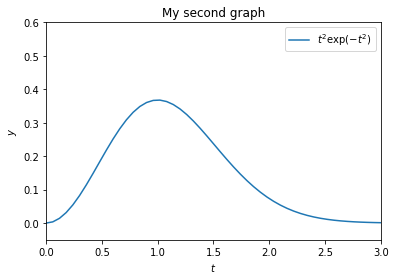

In [4]:
def f(t):
    return t**2*np.exp(-t**2)

# Generates 51 points between 0 and 3
t = np.linspace(0, 3, 51)
y = f(t)
plt.plot(t, y)

# For added awesomeness you can use Latex syntax.
plt.legend(('$t^2\exp(-t^2)$',))

plt.xlabel('$t$')
plt.ylabel('$y$')

# Specify the extent of the axes [tmin, tmax, ymin, ymax]
plt.axis([0, 3, -0.05, 0.6]) 

plt.title('My second graph')
plt.show()

## Exercise 3.1: Plot a formula

`NOTE: We have found that automated assessment is too unreliable for assessing plots. For feedback on the plots compare with your peers or ask one of the TA's to give you feedback.`

* Make a plot of the function $$y(t) = v_0t − 0.5gt^2$$ for $v_0 = 10$, $g = 9.81$, and $t \in [0, 2v_0/g]$. The label on the *x* axis should be 'time (s)' and the label on the *y* axis should be 'height (m)'.

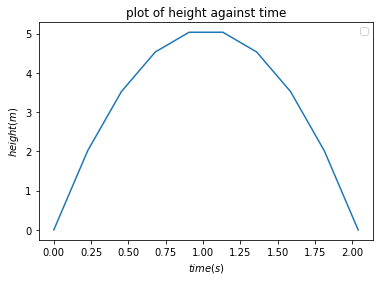

In [13]:
import numpy as np
import matplotlib.pyplot as plt
v0=10;g=9.81
def y(t):
    return v0*t-0.5*g*t**2
t = np.linspace(0,(2*v0/g),10)
y = y(t)
plt.xlabel('$time(s)$')
plt.ylabel('$height(m)$')
plt.title('plot of height against time')
plt.legend(('$v*t-0.5*g*t^2$'),)
plt.plot(t,y)
plt.show()

## Exercise 3.2: Plot another formula

The function

$$f(x, t) = \exp(-(x - 3t)^2)\sin(3\pi(x - t)).$$

describes, for a fixed value of *t*, a wave localized in space. Make a program that visualizes this function as a function of *x* on the interval [−4, 4] when *t* = 0.

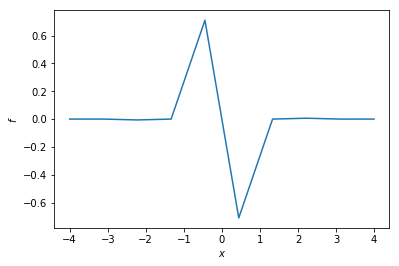

In [14]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
def f(x,t):
    return (np.exp(-(x-3*t)**2)*np.sin(3*pi*(x-t)))
x = np.linspace(-4,4,10)
t = np.zeros(10)
f = f(x,t)
plt.plot(x,f)
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.show()

## Multiple curves in one plot

We can also plot several curves in one plot:

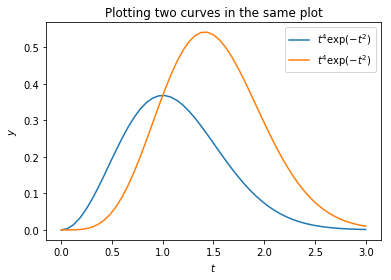

In [15]:
def f1(t):
    return t**2*np.exp(-t**2)

def f2(t):
    return t**2*f1(t)

t = np.linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)

# Matlab-style syntax:
plots = plt.plot(t, y1, t, y2)
plt.legend(plots, ('$t^4\exp(-t^2)$', '$t^4\exp(-t^2)$'), loc='best')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Plotting two curves in the same plot')
plt.show()

When plotting multiple curves in the same plot, PyLab usually does a good job in making sure that the different lines actually look different. However, sometimes you need to take action yourself (*e.g.* if you need to print your graph out in black&white). To do this we can add an extra argument to the plot command where we specify what we want - *e.g.* "r-" means a *red line*, while "bo" means *blue circles*:

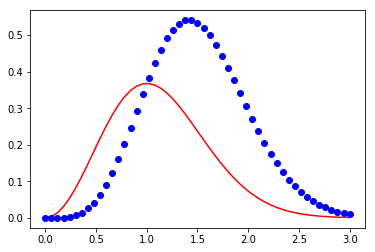

In [8]:
plt.plot(t, y1, 'r-', t, y2, 'bo')
plt.show()

For further examples check out the [matplotlib](https://matplotlib.org/) documentation.

## Exercise 3.3: Plot a formula for several parameters

Write a program in which you generate 10 uniformly spaced values for $v_0$ range from 1 to 20, and plots the function $y(t) = v_0t − 0.5gt^2$ within the time range $t \in [0, 2v_0/g]$. Assume $g = 9.81$.

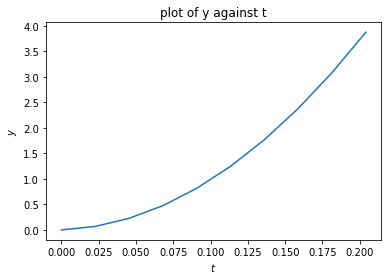

In [17]:
import numpy as np
g =9.8
v0 = np.linspace(1,20,10)
t = np.linspace(0,(2*v0.all()/g),10)
def y(t):
    return v0*t-0.5*g*t**2
y = y(t)
plt.plot(t,y)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('plot of y against t')
plt.show()

## Handling errors gracefully

I expect you have seen plenty of run-time errors. When an error occurs an *exception* is *raised*. These exceptions tend to be very specific and it is worth familiarizing yourself with them.

https://docs.python.org/3/library/exceptions.html#concrete-exceptions

Lets take a look at an example of an out of bounds reference - this raises an exception called an `IndexError`.

```python 
places_to_visit = ("Pompeii",
                   "Fernanda de Noronha",
                   "Dolomites",
                   "Bourbon Street")
print(places_to_visit[4])

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-6-6a516db87396> in <module>()
      1 places_to_visit = ("Pompeii", "Fernanda de Noronha", "Dolomites", "Bourbon Street")
      2 option = 4 # lets assume that the user has given the input option 4
----> 3 print(places_to_visit[option])

IndexError: tuple index out of range```

Here we have an **IndexError** (i.e. a reference out of bounds) with the clarification that it is the **tuple index out of range**.

The general way we deal with this issue in Python (and in many other programming languages) is to try to do what we indend to, and if it fails, we recover from the error. This is implemented using the *try-except* block:
```
try:
    <statements we indend to do>
except:
    <statements for handling errors>
```

If something goes wrong in the **try** block, Python raises an **exception** and the execution jumps immediately to the **except** block. If you use an `except` by itself as above then it will catch all exceptions raised but this is generally considered bad practice as it can hide errors that you might have not anticipated - the last thing we want is to hid a bug!

Let's try an example:

In [18]:
def get_location(index):
    places_to_visit = ("Pompeii",
                       "Fernanda de Noronha",
                       "Dolomites",
                       "Bourbon Street")

    try:
        return places_to_visit[index]
    except TypeError:
        raise TypeError("The index should be an integer.")
    except IndexError:
        raise IndexError("Values must be between 0-3.")

    return None

print("Test case 1: ", get_location(1))

Test case 1:  Fernanda de Noronha


If we pass in 4 as an argument, an *IndexError* ia raised.
```python
print("Test case 2: ", get_location(4))

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-9-9d82aff2337b> in get_location(index)
      7     try:
----> 8         return places_to_visit[index]
      9     except TypeError:

IndexError: tuple index out of range

During handling of the above exception, another exception occurred:

IndexError                                Traceback (most recent call last)
<ipython-input-10-baa17f0505ab> in <module>()
      1 # If we pass in 4 as an argument, an *IndexError* ia raised.
----> 2 print("Test case 2: ", get_location(4))

<ipython-input-9-9d82aff2337b> in get_location(index)
     10         raise TypeError("The index should be an integer.")
     11     except IndexError:
---> 12         raise IndexError("Values must be between 0-3.")
     13 
     14     return None

IndexError: Values must be between 0-3.```

In the above example the expected input is an integer. If the user types a string, e.g. "four", then a **TypeError** is raised, and the approperiate except block is executed.

```python
print("Test case 3: ", get_location("four"))

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-9-9d82aff2337b> in get_location(index)
      7     try:
----> 8         return places_to_visit[index]
      9     except TypeError:

TypeError: tuple indices must be integers or slices, not str

During handling of the above exception, another exception occurred:

TypeError                                 Traceback (most recent call last)
<ipython-input-10-a8af82536957> in <module>()
      2 # If the user types a string, e.g. "four", then a **TypeError** is raised,
      3 # and the approperiate except block is executed.
----> 4 print("Test case 3: ", get_location("four"))

<ipython-input-9-9d82aff2337b> in get_location(index)
      8         return places_to_visit[index]
      9     except TypeError:
---> 10         raise TypeError("The index should be an integer.")
     11     except IndexError:
     12         raise IndexError("Values must be between 0-3.")

TypeError: The index should be an integer.```

This is still not perfect. What happens if you enter -1...?

In [19]:
print("Test case 4: ", get_location(-1))

Test case 4:  Bourbon Street


Recall that negative indices traverse the list from the end to the beginning. We can deal with this issue more elegantly/robustly if we **raise** our own error:

In [20]:
def get_location(index):
    places_to_visit = ("Pompeii",
                       "Fernanda de Noronha",
                       "Dolomites",
                       "Bourbon Street")

    try:
        if not 0 <= index < len(places_to_visit):
            raise IndexError("value must be positive.")
        
        return places_to_visit[index]
    except TypeError:
        raise TypeError("The index should be an integer.")
    except IndexError:
        raise IndexError("Values must be between 0-3.")

    return None
print(get_location(-1))

IndexError: Values must be between 0-3.

```python
print("Test case 5: ", get_location(-1))

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
<ipython-input-11-d29b7f03e343> in get_location(index)
      8         if not 0 <= index < len(places_to_visit):
----> 9             raise IndexError
     10 

IndexError: 

During handling of the above exception, another exception occurred:

IndexError                                Traceback (most recent call last)
<ipython-input-11-d29b7f03e343> in <module>()
     17     return None
     18 
---> 19 print("Test case 5: ", get_location(-1))

<ipython-input-11-d29b7f03e343> in get_location(index)
     13         raise TypeError("The index should be an integer.")
     14     except IndexError:
---> 15         raise IndexError("Values must be between 0-3.")
     16 
     17     return None

IndexError: Values must be between 0-3.```

 Exercise 3.4: Test more in the program

Consider the equation of motion in exercise 3.1.

Implement this as a Python function - call the function *displacement* and specify two positional arguments $t$, $v0$.
The function should raise a ValueError if either $t$ or $v0$ are negative.

In [21]:
g=9.81
def displacement(t,v0):
    y = v0*t-0.5*g*t**2
    try:
        if v0<0 or t<0:
            raise ValueError
        #break
    except ValueError:
        raise ValueError("Values should be positive")
    return y
print(displacement(4,6))


-54.480000000000004


In [22]:
ok.grade('question-3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

## Exercise 3.5: Implement the factorial function with exception handling

The factorial of $n$, written as $n!$, is defined as

$$n! = n(n − 1)(n − 2) \cdots 2 \cdot 1,$$

with the special cases

$$1! = 1,$$ $$0! = 1.$$

For example, $4! = 4 \cdot 3 \cdot 2 \cdot 1 = 24$, and $2! = 2 \cdot 1 = 2$.

Implement your own factorial function to calculate $n!$. Return 1 immediately if $n$ is 1 or 0, otherwise use a loop to compute $n!$. You can use Pythons own [math.factorial(x)](https://docs.python.org/3/library/math.html) to check your code.

An exception should be thrown/raised if the number *n* is negative. If an exception occurs, your program should print a helpful error message and quit.

In [23]:
# Uncomment and complete this code - keep the names the same for testing purposes. 

def my_factorial(x):
    try:
        if x < 0:
            raise ValueError
    except ValueError:
            raise ValueError("Value should be greater than 0")
   # return my_factorial(x)
    if x == 1 or x == 0:
        fact = 1
        return fact
    elif x > 1:
        a = 1
        my_fact = 1
        while x >=2 :
            my_fact *= x
            x = x - 1
    return my_fact
print(my_factorial(4))
    
        


24


In [24]:
ok.grade('question-3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 4}

## Exercise 3.6: Wave speed

The longitudinal wave velocity in a material is given by the equation:
$$V_p = \sqrt{\frac{k+4\mu/3}{\rho}},$$
where $V_p$ is the longitudinal wave velocity, $k$ is the bulk modulus, $\mu$ is the shear modulus and $\rho$ is the density. The shear wave velocity is given by the equation:
$$V_s = \sqrt{\frac{\mu}{\rho}},$$
where $V_s$ is the shear velocity.

1. Write a *function* that takes as arguments $k$, $\mu$ and $\rho$, and returns $V_p$ and $V_s$.
2. Ensure your function raises a ValueError if any of the input arguments have a non-physical value (ie cannot have negative density).

| Material               | Shear modulus (GPa) | Bulk modulus (GPa) | Density (kg/m^3)|
|------------------------|---------------------|--------------------|-----------------|
|Quartz                  | 44                  | 38                 | 2650            | 
|Clay                    | 6.85                | 20.9               | 2580            |
|Water                   | 0                   | 2.29               | 1000            |


In [25]:
# Uncomment and complete this code - keep the names the same for testing purposes. 

# mu: Shear modulus (GPa), k: Bulk modulus (GPa), rho:Density (kg/m^3)
def calc_material_velocity(mu, k, rho):
    from math import sqrt
    try:
        if mu < 0 or k < 0 or rho < 0:
            raise ValueError
    except ValueError:
        raise ValueError("Any of the variables can't be negative")
    if mu >= 0 and k >= 0 and rho >= 0:
        Vp = (sqrt((k + (4*mu/3))*10e6/rho))/100
        Vs = (sqrt(mu*10e6/rho))/100
    return Vp, Vs
Quartz = print(calc_material_velocity(44,38,2650))
Clay = print(calc_material_velocity(6.85,20.9,2580))
Water = print(calc_material_velocity(0,2.29,1000))
    
#     return vp, vs

(6.039700938074969, 4.074772826171499)
(3.4118656001350662, 1.6294289673655376)
(1.5132745950421558, 0.0)


In [26]:
ok.grade('question-3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 4}

## Reading data from a plain text file
We can read text from a [text file](http://en.wikipedia.org/wiki/Text_file) into strings in a program. This is a common (and simple) way for a program to get input data. The basic recipe is:
```python
# Open text file
infile = open("myfile.dat", "r")

# Read next line:
line = infile.readline()

# Read the lines in a loop one by one:
for line in infile:
    <process line>

# Load all lines into a list of strings:
lines = infile.readlines()
for line in lines:
    <process line>```

Let's look at the file [./data/data1.txt](./data/data1.txt) (all of the data files in this lecture are stored in the sub-folder *data/* of this notebook library). The files has a column of numbers:
```
21.8
18.1
19
23
26
17.8```

The goal is to read this file and calculate the mean:

In [27]:
# Open data file
infile = open("data/data1.txt", "r")

# Initialise values
mean = 0
n=0

# Loop to perform sum
for number in infile:
    number = float(number)
    mean = mean + number
    n += 1
    
# It is good practice to close a file when you are finished. 
infile.close()

# Calculate the mean.
mean = mean/n
print(mean)

20.95


Let's make this example more interesting. There is a **lot** of data out there for you to discover all kinds of interesting facts - you just need to be interested in learning a little analysis. For this case I have downloaded tidal gauge data for the port of Avonmouth from the [BODC](http://www.bodc.ac.uk/). Take some time now to open the file and have a look through it - [data/2012AVO.txt](data/2012AVO.txt) you will see the [metadata](http://en.wikipedia.org/wiki/Metadata):

```
Port:              P060
Site:              Avonmouth
Latitude:          51.51089
Longitude:         -2.71497
Start Date:        01JAN2012-00.00.00
End Date:          30APR2012-23.45.00
Contributor:       National Oceanography Centre, Liverpool
Datum information: The data refer to Admiralty Chart Datum (ACD)
Parameter code:    ASLVTD02 = Surface elevation (unspecified datum) of the water body by fixed in-situ pressure sensor```

Let's read the column ASLVTD02 (the surface elevation) and plot it:

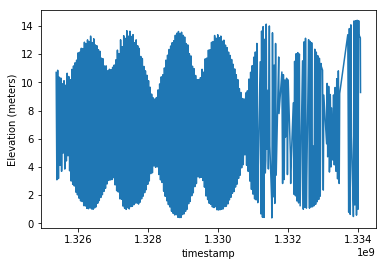

In [28]:
import matplotlib.pyplot as plt
import pendulum
import numpy as np

tide_file = open("data/2012AVO.txt", "r")

# Initialise an empty list to store the elevation
elevation = []
time = []

for line in tide_file:
    # Here we use a try/except block to try to read the data and
    # raise an exception if we fail to parse the data in a line
    # for some reason. This is a neat trick to skip over all the
    # header information. 
    try:
        # Split this line into words. 
        words = line.split()

        # If we do not have 5 words then the line must be part of the header.
        if len(words)!=5:
            raise ValueError
        
        # The elevation data is on the 4th column. However, the BODC
        # appends a "M" when a value is improbable and an "N" when
        # data is missing (maybe a ship dumped into it during rough weather!)
        # As we are in a try/except block, an error will be raised
        # in the float conversion when this situation arises.
        level = float(words[3])
        elevation.append(level)

        # Form a single string with the date and time.
        date_time = ' '.join(words[1:3])
        
        # Dealing with dates and time is a major pain as there are
        # several different formats. Luckily there are lots of people
        # out there writting libraries that are making your life easier.
        # At the moment the Python library *pendulum* seems to be the
        # best out there for parsing various different date and time
        # formats and is pretty easy to use.
        date_time = pendulum.parse(date_time)

        # So that we can plot this we are going to convert this date
        # and time into a POSIX timestamp (aka UNIX Epoch time):
        # https://en.wikipedia.org/wiki/Unix_time
        time.append(date_time.timestamp())
    except:
        pass
    
# For plotting lets convert the list to a NumPy array.
elevation = np.array(elevation)
time = np.array(time)

plt.plot(time, elevation)
plt.xlabel("timestamp")
plt.ylabel("Elevation (meters)")
plt.show()

Quiz time:

* What tidal constituents can you identify by looking at this plot?
* Is this primarily a diurnal or semi-diurnal tidal region? (hint - change the x-axis range on the plot above).

You will notice in the above example that we used the *split()* string member function. This is a very useful function for grabbing individual words on a line. When called without any arguments it assumes that the [delimiter](http://en.wikipedia.org/wiki/Delimiter) is a blank space. However, you can use this to split a string with any delimiter, *e.g.*, *line.split(';')*, *line.split(':')*.

It is a semidiurnal tidal cycle because it shows two high and two low tides of approximately equal size every lunar day.

## Exercise 3.7: Read a two-column data file
The file [data/xy.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/xy.dat) contains two columns of numbers, corresponding to *x* and *y* coordinates on a curve. The start of the file looks like this:

-1.0000   -0.0000</br>
-0.9933   -0.0087</br>
-0.9867   -0.0179</br>
-0.9800   -0.0274</br>
-0.9733   -0.0374</br>

Make a program that reads the first column into a list `xlist_61` and the second column into a list `ylist_61`. Then convert the lists to arrays named `xarray_61` and `yarray_61`, and plot the curve. Store the maximum and minimum y coordinates in two variables named `ymin_61` and `ymax_61`. (Hint: Read the file line by line, split each line into words, convert to float, and append to `xlist_61` and `ylist_61`.)</br>

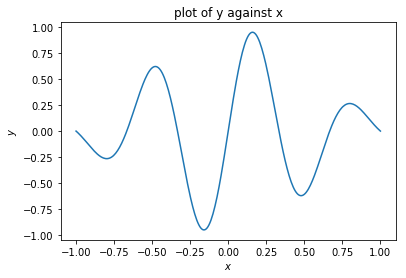

In [29]:
import matplotlib.pyplot as plt
import numpy as np

file1 = open('data/xy.dat','r')
xlist_61 = []
ylist_61 = []
for line in file1:
    series = line.split()
    x = float(series[0])
    y = float(series[1])
    xlist_61.append(x)
    ylist_61.append(y)
xarray_61=np.array(xlist_61)
yarray_61=np.array(ylist_61)
ymin_61 = min(yarray_61)
ymax_61 = max(yarray_61)

plt.plot(xarray_61,yarray_61)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('plot of y against x')
plt.show()


In [30]:
grade = ok.grade('question-3_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 9
    Failed: 0
[ooooooooook] 100.0% passed



## Exercise 3.8: Read a data file

The files [data/density_water.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/density_water.dat) and [data/density_air.dat](https://raw.githubusercontent.com/ggorman/Introduction-to-programming-for-geoscientists/master/notebook/data/density_air.dat) contain data about the density of water and air (respectively) for different temperatures. The data files have some comment lines starting with # and some lines are blank. The rest of the lines contain density data: the temperature in the first column and the corresponding density in the second column. The goal of this exercise is to read the data in such a file, discard commented or blank lines, and plot the density versus the temperature as distinct (small) circles for each data point. Write a function `readTempDenFile` that takes a filename as argument and returns two lists containing respectively the temperature and the density. Call this function on both files, and store the temperature and density in lists called `temp_air_list`, `dens_air_list`, `temp_water_list` and `dens_water_list`.

[0.0, 4.0, 15.0, 20.0, 25.0, 37.0, 50.0, 100.0] [999.8425, 999.975, 999.1026, 998.2071, 997.0479, 993.3316, 988.04, 958.3665]
[-10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0] [1.341, 1.316, 1.293, 1.269, 1.247, 1.225, 1.204, 1.184, 1.164]


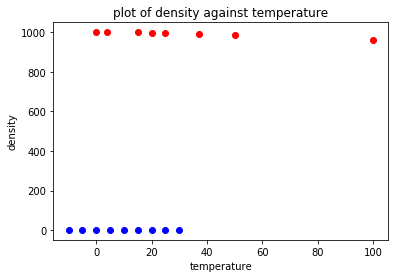

In [31]:
import matplotlib.pyplot as plt
import numpy as np
file2 = open("data/density_water.dat","r")
file3 = open("data/density_air.dat","r")
wx = []
wy = []
ax = []
ay = []
for line1 in file2:
    series2 = line1.split()
    try:
        if series2[0] != '#' and series2[0] != ():
        #if len(series2)!=2:
            #raise ValueError
            x_1 = float(series2[0])
            y_1 = float(series2[1])
            wx.append(x_1)
            wy.append(y_1)
    except:
        pass 
for line2 in file3:
    series3 = line2.split()
    try:
        if series3[0] != '#' and series3[0] != ():
            a_1 = float(series3[0])
            a_2 = float(series3[1])
            ax.append(a_1)
            ay.append(a_2)
    except:
        pass
plt.plot(wx,wy,'ro',ax,ay,'bo')
plt.xlabel('temperature')
plt.ylabel('density')
plt.title('plot of density against temperature')
file2.close()
file3.close()

def readTempDenFile(p):
    filen = open(p,'r')
    tn = []
    dn = []
    for linen in filen:
        seriesn = linen.split()
        try:
            if seriesn[0] !=() and seriesn[1] !='#':
                t_n = float(seriesn[0])
                d_n = float(seriesn[1])
                tn.append(t_n)
                dn.append(d_n)
        except:
            pass
    return tn, dn

temp_water_list,dens_water_list = readTempDenFile("data/density_water.dat")
 #= t_n
# = d_n
#print(temp_water_list)
#print(dens_water_list)

temp_air_list ,dens_air_list = readTempDenFile("data/density_air.dat")
print(temp_water_list, dens_water_list)
print(temp_air_list, dens_air_list)



In [32]:
grade = ok.grade("question-3_8")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



## Exercise 3.9: Read acceleration data and find velocities

A file [data/acc.dat](./data/acc.dat) contains measurements $a_0, a_1, \ldots, a_{n-1}$ of the acceleration of an object moving along a straight line. The measurement $a_k$ is taken at time point $t_k = k\Delta t$, where $\Delta t$ is the time spacing between the measurements. The purpose of the exercise is to load the acceleration data into a program and compute the velocity $v(t)$ of the object at some time $t$.

In general, the acceleration $a(t)$ is related to the velocity $v(t)$ through $v^\prime(t) = a(t)$. This means that

$$
v(t) = v(0) + \int_0^t{a(\tau)d\tau}
$$

If $a(t)$ is only known at some discrete, equally spaced points in time, $a_0, \ldots, a_{n-1}$ (which is the case in this exercise), we must compute the integral above numerically, for example by the Trapezoidal rule:

$$
v(t_k) \approx v(0) + \Delta t \left(\frac{1}{2}a_0 + \frac{1}{2}a_k + \sum_{i=1}^{k-1}a_i \right), \ \ 1 \leq k \leq n-1. 
$$

We assume $v(0) = 0$ so that also $v_0 = 0$.
Read the values $a_0, \ldots, a_{n-1}$ from file into an array `acc_array_63` and plot the acceleration versus time for $\Delta_t = 0.5$. The time should be stored in an array named `time_array_63`.

Then write a function `compute_velocity(dt, k, a)` that takes as arguments a time interval $\Delta_t$ `dt`, an index `k` and a list of accelerations `a`, uses the Trapezoidal rule to compute one $v(t_k)$ value and return this value. Experiment with different values of $\Delta t$ and $k$.

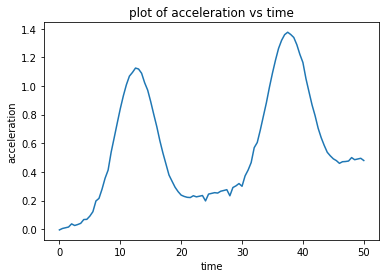

12.870976451446445
0.08200855911008001


In [33]:
import matplotlib.pyplot as plt
import numpy as np
acc = open('data/acc.dat','r')
alist = []
timek = [0]
delt = 0
for linek in acc:
    seriesk = float(linek)
    alist.append(seriesk)
acc_array_63 = np.array(alist)
for p in range(len(acc_array_63)-1):
    delt += 0.5
    timek.append(delt)
time_array_63 = np.array(timek)
plt.plot(time_array_63,acc_array_63)
plt.xlabel('time')
plt.ylabel('acceleration')
plt.title('plot of acceleration vs time')
plt.show()

def compute_velocity(dt,k,a):
    vt = (0.5*a[0]+0.5*a[k])
    i = 0
    for i in range(k):
        vt = vt + a[i]
        i += 1
    vtk = dt * vt
    return vtk
print(compute_velocity(0.5,63,alist))
print(compute_velocity(2,4,alist))


In [34]:
grade = ok.grade('question-3_9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 15
    Failed: 0
[ooooooooook] 100.0% passed



## File writing
Writing a file in Python is simple. You just collect the text you want to write in one or more strings and, for each string, use a statement along the lines of

```python
outfile.write(string)```

The write function does not add a newline character so you may have to do that explicitly:

```python
outfile.write(string + ’\n’)```

That’s it! Compose the strings and write! Let's do an example. Write a nested list (table) to a file:

In [35]:
# Let's define some table of data
data = [[ 0.75,        0.29619813, -0.29619813, -0.75      ],
        [ 0.29619813,  0.11697778, -0.11697778, -0.29619813],
        [-0.29619813, -0.11697778,  0.11697778,  0.29619813],
        [-0.75,       -0.29619813,  0.29619813,  0.75      ]]

# Open the file for writing. Notice the "w" indicates we are writing!
outfile = open("tmp_table.dat", "w")
for row in data:
    for column in row:
        outfile.write("%14.8f" % column)
    outfile.write("\n")   # ensure newline
outfile.close()

And that's it - run the above cell and take a look at the file that was generated in your Azure library clone.

## Exercise 3.10: Write function data to a file

We want to dump $x$ and $f(x)$ values to a file named function_data.dat, where the $x$ values appear in the first column and the $f(x)$ values appear in the second. Choose $n$ equally spaced $x$ values in the interval [-4, 4]. Here, the function $f(x)$ is given by:

$f(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)$

In [37]:
import numpy as np
from math import *
x = np.linspace(-4,4,10)
f_x=[]
for i in range(len(x)):
    p = (1/sqrt(2*pi))* exp(-0.5*x[i]**2)
    f_x.append(p)
fx = np.array(f_x)
table =[[i,j] for i,j in zip(x,fx)]
table1 = np.array(table)
output = open('function_data.dat', 'w')
for first in table1:
    for second in first:
        output.write("%.3f" %second + '\n')
output.close()


In [38]:
ok.grade('question-3_10')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 4}

In [39]:
 ok.score()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Scoring tests

---------------------------------------------------------------------
question 3.4
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 3.5
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 3.6
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 3.7
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 3.8
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
question 3.9
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

---------------------------------------------------------------------
quest

{'Total': 7.0}